In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [ ]:
#Valor do Preço do Petróleo

In [21]:

# Carregue seus dados em um DataFrame (substitua 'seu_dataframe.csv' pelo nome do seu arquivo)
df = pd.read_csv('files/input/USDBRL=X.csv', sep=',')

In [22]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [23]:
df.drop(columns=['Open', 'High','Low','Close','Volume'],axis=1,inplace=True)

In [24]:
df.columns = ['Data','Valor']

In [25]:


# Certifique-se de que a coluna 'Data' está no formato de data
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

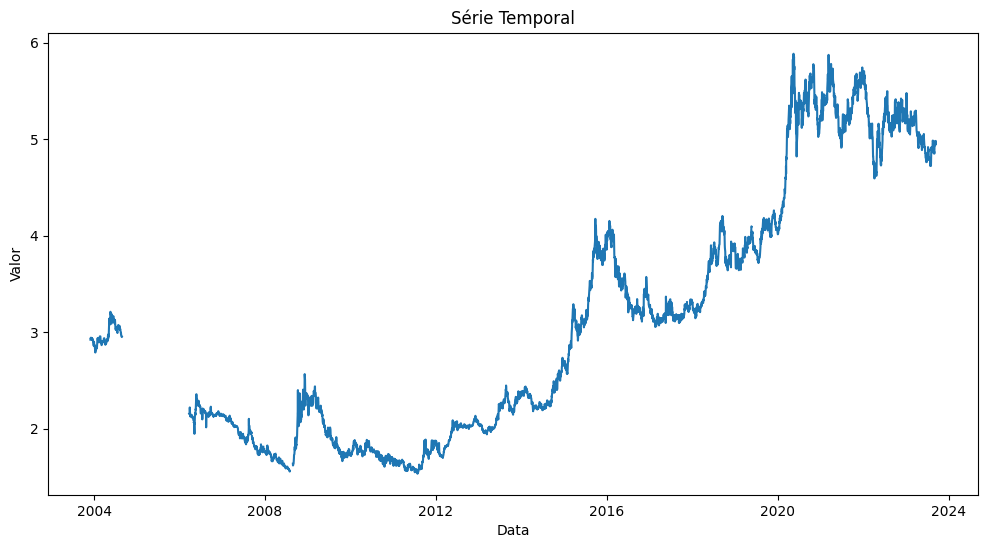

In [26]:

# Visualize sua série temporal
plt.figure(figsize=(12, 6))
plt.plot(df['Valor'])
plt.title('Série Temporal')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()

c:\Projetos\forecast-kayo\.venv\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


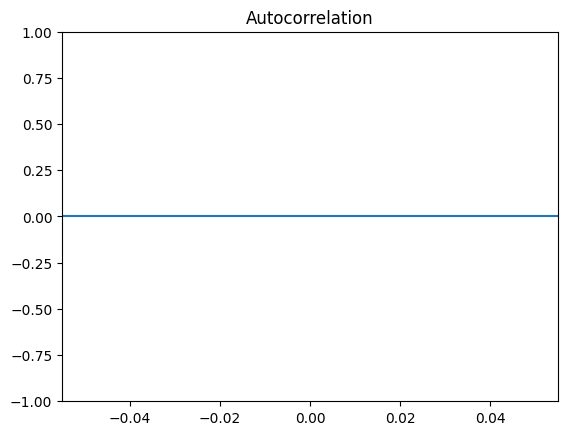

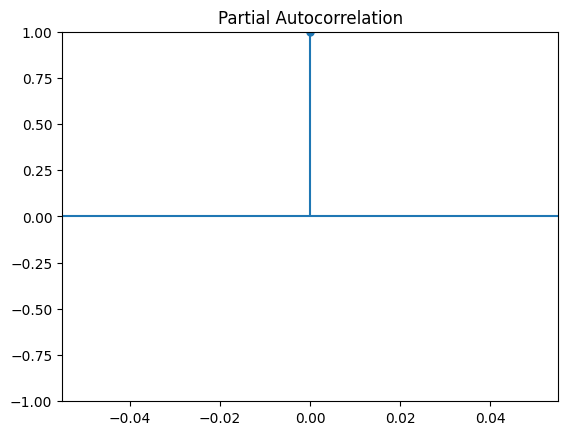

In [27]:
# Determine os valores adequados para os hiperparâmetros do SARIMA
plot_acf(df['Valor'], lags=30)
plot_pacf(df['Valor'], lags=30)
plt.show()

c:\Projetos\forecast-kayo\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Projetos\forecast-kayo\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


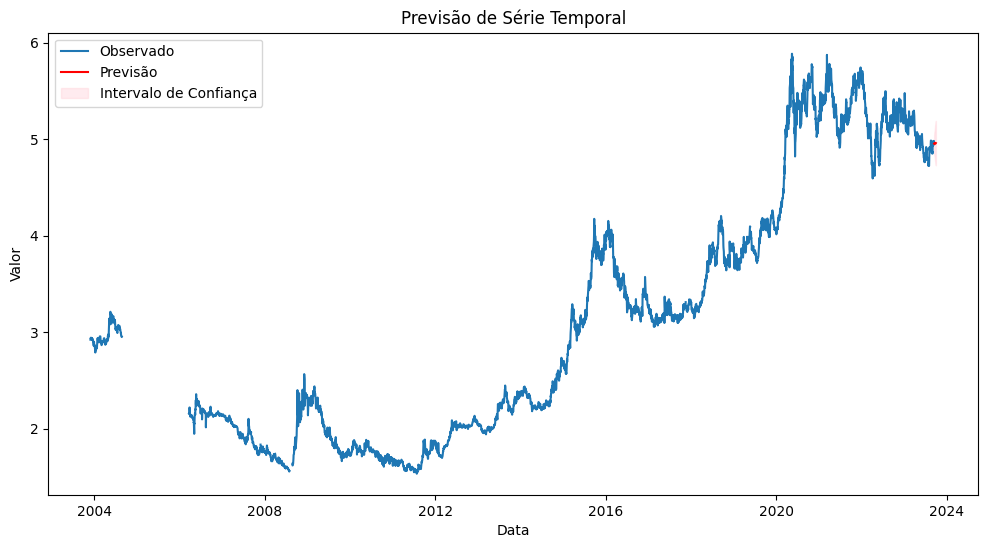

In [28]:
# Defina os hiperparâmetros do modelo SARIMA (substitua com valores adequados)
p = 1  # Ordem do AR (Auto-Regressive)
d = 1  # Ordem de diferenciação
q = 1  # Ordem do MA (Moving Average)
P = 1  # Ordem do AR sazonal
D = 1  # Ordem de diferenciação sazonal
Q = 1  # Ordem do MA sazonal
s = 12  # Frequência sazonal (por exemplo, 12 para dados mensais)

# Crie e ajuste o modelo SARIMA aos seus dados
model = SARIMAX(df['Valor'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Faça previsões para um período futuro (ajuste o número de passos conforme necessário)
forecast_steps = 12  # Número de passos para previsão futura
forecast = results.get_forecast(steps=forecast_steps)

# Obtenha os valores previstos e os intervalos de confiança
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Visualize as previsões
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Valor'], label='Observado')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='Previsão')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confiança')
plt.title('Previsão de Série Temporal')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()
